In [31]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('data/togo-dapaong_qc.csv')

In [33]:
#1 Summary Statistics & Missing-Value Report

In [34]:
#1.1Summary Statistics

stastics_summary = df.describe() 
stastics_summary

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [35]:
#1.2 Missing Values

missing_values = df.isna()
missing_values.sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [36]:
missing_columns = df.columns[missing_values.mean()>0.05]
print(f'Columns with > 5% nulls:{missing_columns}')

Columns with > 5% nulls:Index(['Comments'], dtype='object')


In [37]:
#2 Outlier Detection & Basic Cleaning

In [38]:
#2.1 Z-Score for Outliers:

columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outlier rows:", df[outliers].shape[0])

#2.2 Handle Missing Data:

df[columns] = df[columns].fillna(df[columns].median())
df[columns]

#Export cleaned DataFrame to data/togo_clean.csv

df.to_csv("data/togo_clean.csv", index=False)


Outlier rows: 9251


In [39]:
#4 Time Series Analysis

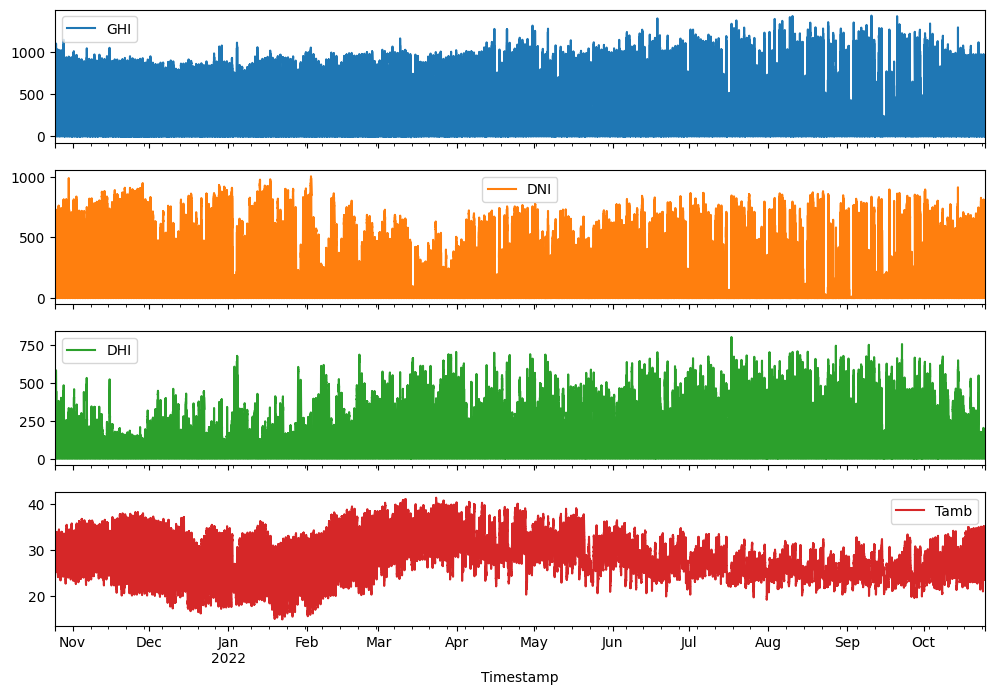

In [49]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.savefig('notebooks/images/time_series_analysis.png')
plt.show()

In [ ]:
#5 Cleaning Impact

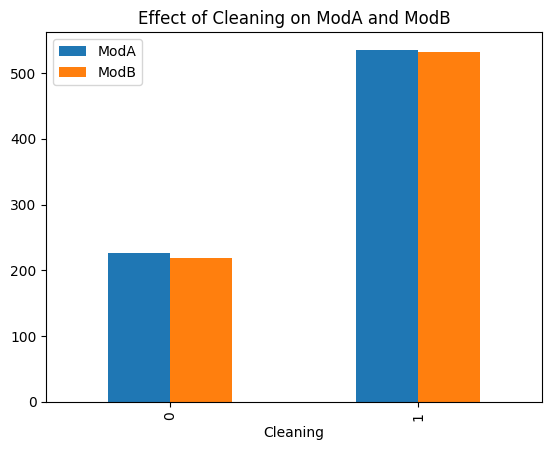

In [50]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Effect of Cleaning on ModA and ModB")
plt.savefig('notebooks/images/cleaning_impact.png')
plt.show()

In [ ]:
#6 Correlation & Relationship Analysis

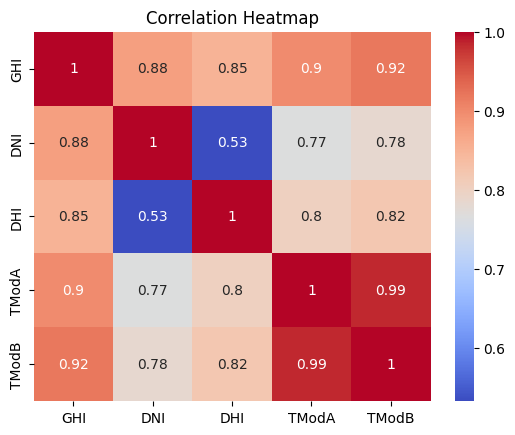

In [51]:
#6.1 Heatmap

sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('notebooks/images/heatmap.png')
plt.show()

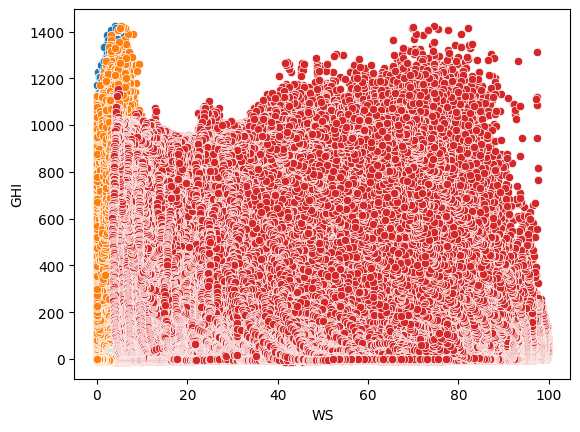

In [52]:
#6.2 Scatter Plots:
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='WSgust', y='GHI')
sns.scatterplot(data=df, x='RH', y='Tamb')
sns.scatterplot(data=df, x='RH', y='GHI')
plt.savefig('notebooks/images/scatter.png')

In [ ]:
#7 Wind & Distribution Analysis

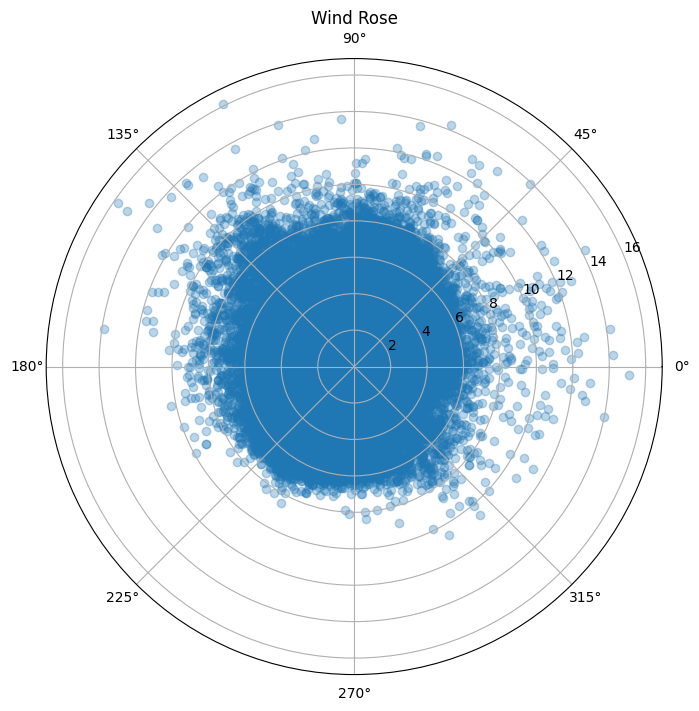

In [45]:
#7.1 Wind Rose / Radial Bar:

theta = np.deg2rad(df['WD'])
r = df['WS']
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.scatter(theta, r, alpha=0.3)
plt.title("Wind Rose")
plt.savefig('notebooks/images/wind_rose.png')
plt.show()


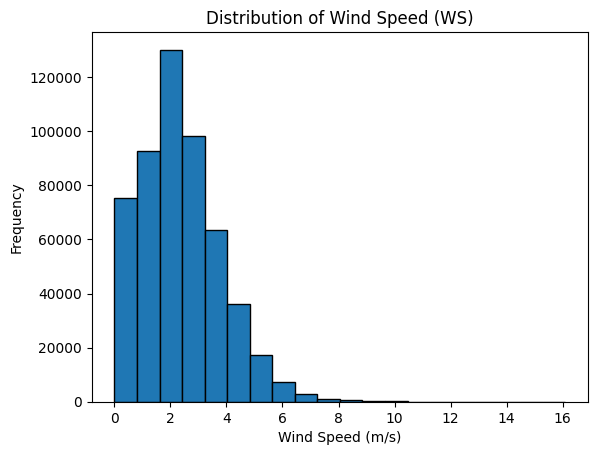

In [69]:
#7.2 Histograms for GHI

df['WS'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(False)  # Optional: Remove grid for cleaner look
plt.savefig('notebooks/images/histograms_GHI.png')
plt.show()

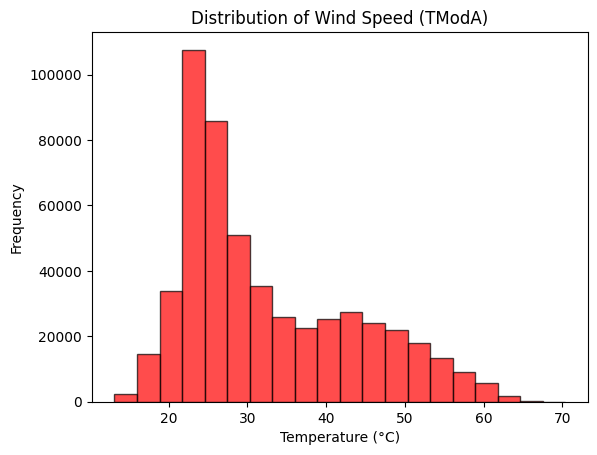

In [72]:
#7.3 Histograms for TModA

df['TModA'].hist(bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Wind Speed (TModA)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(False)  # Optional: Remove grid for cleaner look
plt.savefig('notebooks/images/histograms_TModA.png')
plt.show()

In [ ]:
#8 Temperature & RH Influence

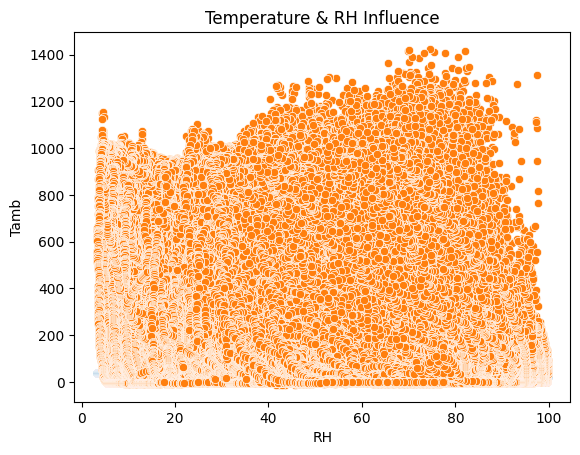

In [75]:
sns.scatterplot(data=df, x='RH', y='Tamb')
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title('Temperature & RH Influence')
plt.savefig('notebooks/images/temperature_RH_influence.png')

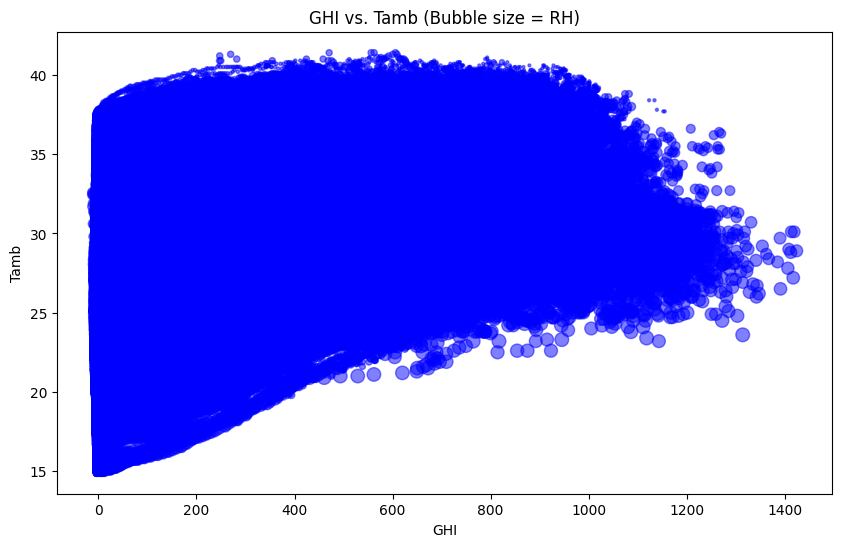

In [71]:
#9 Bubble Chart
plt.figure(figsize=(10,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='blue')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs. Tamb (Bubble size = RH)')
plt.savefig('notebooks/images/bubble_chart.png')
plt.show()
